# Aufgabe 1
**a) Lesen Sie die CSV-Dateien,die die Stromerzeugungsdaten und Börsenstrompreise enthalten ein und führen Sie sie in einem DataFrame namens `df_hourly` zusammen.**

In [102]:
import os

import numpy as np
import pandas as pd
path = 'DAT-WS2425-Projektarbeit\DAT-WS2425-Projektarbeit\Daten\Strompreisdaten'
extension = '.csv'
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
files = [file for file in os.listdir(path) if file.endswith(extension)]

dfs = []
filecounter =0
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)
    filecounter += 1
    
print("total files: ", filecounter)
df = pd.concat(dfs, ignore_index=True)

total files:  258


**b) Passen Sie die dtypes der Spalten von `df_hourly` geeignet an. Überführen Sie insbesondere das Datum in ein DateTime-Format. Entfernen Sie alle Datensätze, die sich nicht auf
 den Betrachtungszeitraum 2020-2024 beziehen.**

In [103]:
df['Datum (MEZ)'] = pd.to_datetime(df['Datum (MEZ)'])
df['Datum (MESZ)'] = pd.to_datetime(df['Datum (MESZ)'])
print(len(df['Datum (MESZ)']))

43392


In [104]:
df = df.drop(df[df['Datum (MEZ)']<'2020-01-01'].index)

**c) Beurteilen Sie die Datenqualität des Datensatzes und führen Sie, sofern aus Ihrer Sicht notwendig, geeignete Datenbereinigungsschritte durch.**

In [105]:
# Separating and Creating new columns for Date and Time from Datum (MEZ) and Datum (MESZ)
df['Datum'] = df['Datum (MEZ)'].dt.date
df['Zeit'] = df['Datum (MEZ)'].dt.time
df['Datum'] =df['Datum'].fillna(df['Datum (MESZ)'].dt.date)
df['Zeit'] =df['Zeit'].fillna(df['Datum (MESZ)'].dt.time)
cols = df.columns.tolist()
print(cols)

['Datum (MEZ)', 'Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)', 'Datum (MESZ)', 'Datum', 'Zeit']


In [106]:
cols = ['Datum', 'Zeit','Datum (MEZ)', 'Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)', 'Datum (MESZ)']
df = df[cols]
df = df.drop(columns=['Datum (MEZ)', 'Datum (MESZ)'])
df = df.reset_index(drop=True)
df

,Datum,Zeit,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
0,2020-01-01,00:00:00,18754.70,13961.99,41.88
1,2020-01-01,01:00:00,18337.54,14242.17,38.60
2,2020-01-01,02:00:00,18122.83,14584.20,36.55
3,2020-01-01,03:00:00,18323.93,14746.24,32.32
4,2020-01-01,04:00:00,18327.59,14924.48,30.85
...,...,...,...,...,...
43339,2024-12-10,19:00:00,NaN,NaN,180.17
43340,2024-12-10,20:00:00,NaN,NaN,166.60
43341,2024-12-10,21:00:00,NaN,NaN,151.15
43342,2024-12-10,22:00:00,NaN,NaN,137.94


**d) Erzeugen Sie aus `df_hourly` einen weiteren DataFrame namens `df_daily`, der in jeder
 Zeile die erzeugte elektrische Energie mit erneuerbaren und nicht erneuerbaren Energie
trägern sowie den an diesem Tag durchschnittlich gemessenen Börsenstrompreis enthält.**

In [107]:
# New df_daily with sum of Leistung and average of Auktion preis for every day
df_daily = df.groupby(['Datum']).agg({'Leistung nicht erneuerbar (MW)': 'sum', 'Leistung erneuerbar (MW)': 'sum', 'Day Ahead Auktion Preis (EUR/MWh)' : 'mean'}).reset_index()
df_daily

,Datum,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
0,2020-01-01,468837.03,441093.57,34.964167
1,2020-01-02,505002.46,605620.76,38.869167
2,2020-01-03,427798.33,968577.88,26.111250
3,2020-01-04,411321.40,987041.46,20.322917
4,2020-01-05,508187.80,514534.00,35.552500
...,...,...,...,...
1801,2024-12-06,482833.73,969065.85,86.374583
1802,2024-12-07,386654.54,834428.48,71.508333
1803,2024-12-08,455016.51,609461.18,99.068333
1804,2024-12-09,491439.42,833223.84,99.591250


# Aufagbe 2

**a) An welchen 10 Tagen im Betrachtungszeitrum wurde am meisten Strom aus erneuerbaren Energieträgern erzeugt?**

In [108]:
df_daily.sort_values('Leistung erneuerbar (MW)', ascending=False).head(10)

,Datum,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
1497,2024-02-06,331773.90,1380463.41,45.292917
1496,2024-02-05,331039.23,1358926.97,35.840833
1484,2024-01-24,351983.99,1316391.11,33.122917
1450,2023-12-21,275886.68,1308032.94,25.280417
1451,2023-12-22,242307.14,1289984.86,22.655833
827,2022-04-07,396999.16,1274027.01,74.153333
778,2022-02-17,381238.33,1271433.30,68.637083
1731,2024-09-27,198813.32,1269933.18,14.757500
1458,2023-12-29,221981.80,1261365.77,6.359583
41,2020-02-11,351153.81,1257586.20,11.620000


**b) An welchem Tag im Betrachtungszeitraum wurde der höchste Bösenstrompreis verzeichnet und wie hoch war er? An welchem Tag wurde der geringste Preis verzeichnet und wie hoch war er?**

In [109]:
df_daily[df_daily['Day Ahead Auktion Preis (EUR/MWh)'] == df_daily['Day Ahead Auktion Preis (EUR/MWh)'].max()]

,Datum,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
968,2022-08-26,640735.36,493492.08,699.441667


In [110]:
df_daily[df_daily['Day Ahead Auktion Preis (EUR/MWh)'] == df_daily['Day Ahead Auktion Preis (EUR/MWh)'].min()]

,Datum,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
1278,2023-07-02,183483.62,940768.39,-53.870833


**c) Wie viele Tage gab es im Betrachtungszeitraum 2020-2024, an denen ein negativer Börsenstrompreis aufgetreten ist?**

In [111]:
print(len(df_daily[df_daily['Day Ahead Auktion Preis (EUR/MWh)'] < 0]))

13


In [112]:
df_daily[df_daily['Day Ahead Auktion Preis (EUR/MWh)'] < 0]

,Datum,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh)
46,2020-02-16,252739.69,1152357.76,-8.274167
52,2020-02-22,243166.11,1236952.50,-1.508750
81,2020-03-22,260187.93,969434.27,-0.947083
103,2020-04-13,204282.71,875000.49,-15.966250
111,2020-04-21,218578.73,1151305.34,-16.149583
...,...,...,...,...
460,2021-04-05,227435.87,1056971.92,-16.996667
507,2021-05-22,189386.15,1076837.53,-7.039167
1095,2022-12-31,230450.27,953465.27,-0.792083
1278,2023-07-02,183483.62,940768.39,-53.870833


**d) Wie viel Strom wurde pro Jahr mit erneuerbaren und mit nicht erneuerbaren Energieträgernerzeugt?**

In [113]:
df2 = df

In [123]:
df2['Jahr'] = pd.DatetimeIndex(df2['Datum']).year
df_yearly = df2.groupby(['Jahr']).agg({'Leistung nicht erneuerbar (MW)':'sum', 'Leistung erneuerbar (MW)':'sum'}).reset_index()
df2

,Datum,Zeit,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh),Jahr
0,2020-01-01,00:00:00,18754.70,13961.99,41.88,2020
1,2020-01-01,01:00:00,18337.54,14242.17,38.60,2020
2,2020-01-01,02:00:00,18122.83,14584.20,36.55,2020
3,2020-01-01,03:00:00,18323.93,14746.24,32.32,2020
4,2020-01-01,04:00:00,18327.59,14924.48,30.85,2020
...,...,...,...,...,...,...
43339,2024-12-10,19:00:00,NaN,NaN,180.17,2024
43340,2024-12-10,20:00:00,NaN,NaN,166.60,2024
43341,2024-12-10,21:00:00,NaN,NaN,151.15,2024
43342,2024-12-10,22:00:00,NaN,NaN,137.94,2024


# Aufgabe 3
**a) Visualisieren Sie in geeigneten Diagrammen die Verteilung der Börsenstrompreise (insgesamt und pro Jahr).**

<Axes: title={'center': 'Verteilung der Börsenstrompreise (pro jahr)'}, xlabel='Jahr'>

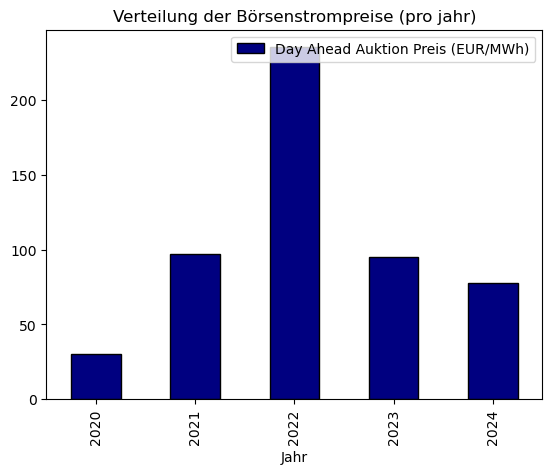

In [115]:
df_yearly = df2.groupby(['Jahr']).agg({'Leistung nicht erneuerbar (MW)':'sum', 'Leistung erneuerbar (MW)':'sum', 'Day Ahead Auktion Preis (EUR/MWh)':'mean'}).reset_index()
df_yearly.plot.bar(x='Jahr', y='Day Ahead Auktion Preis (EUR/MWh)', colormap='jet', edgecolor='k', title='Verteilung der Börsenstrompreise (pro jahr)')

<Axes: title={'center': 'Verteilung der Börsenstrompreise (insgesamt)'}, xlabel='Datum'>

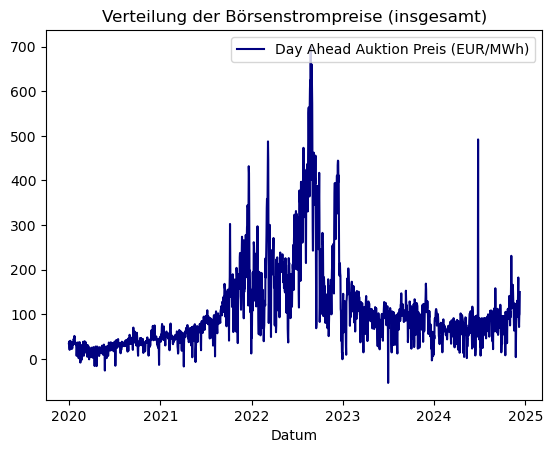

In [116]:
df_daily.plot(x='Datum', y='Day Ahead Auktion Preis (EUR/MWh)', colormap='jet', title='Verteilung der Börsenstrompreise (insgesamt)')

**b) Berechnen Sie bezogen auf die einzelnen Jahre des Betrachtungszeitraums verschiedene statistische Kenngrößen für den Börsenstrompreis.**

In [124]:
df_year_2020 = df2[df2['Jahr'] == 2020].reset_index()
df_year_2021 = df2[df2['Jahr'] == 2021].reset_index()
df_year_2022 = df2[df2['Jahr'] == 2022].reset_index()
df_year_2023 = df2[df2['Jahr'] == 2023].reset_index()
df_year_2024 = df2[df2['Jahr'] == 2024].reset_index()
print(df_year_2020.columns.tolist())

['index', 'Datum', 'Zeit', 'Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)', 'Jahr']


In [118]:
sk_2020=df_year_2020.groupby('Jahr')[['Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)']].agg(['mean', 'std'])
sk_2021=df_year_2021.groupby('Jahr')[['Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)']].agg(['mean', 'std'])
sk_2022=df_year_2022.groupby('Jahr')[['Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)']].agg(['mean', 'std'])
sk_2023=df_year_2023.groupby('Jahr')[['Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)']].agg(['mean', 'std'])
sk_2024=df_year_2024.groupby('Jahr')[['Leistung nicht erneuerbar (MW)', 'Leistung erneuerbar (MW)', 'Day Ahead Auktion Preis (EUR/MWh)']].agg(['mean', 'std'])

In [119]:
print(sk_2020)
print("----------------------------------------------------------------------------------------------------------------")
print(sk_2021)
print("----------------------------------------------------------------------------------------------------------------")
print(sk_2022)
print("----------------------------------------------------------------------------------------------------------------")
print(sk_2023)
print("----------------------------------------------------------------------------------------------------------------")
print(sk_2024)

     Leistung nicht erneuerbar (MW)             Leistung erneuerbar (MW)  \
                               mean         std                     mean   
Jahr                                                                       
2020                   21289.996511  8849.76195             27239.596161   

                   Day Ahead Auktion Preis (EUR/MWh)             
               std                              mean        std  
Jahr                                                             
2020  11770.642963                         30.470716  17.500845  
----------------------------------------------------------------------------------------------------------------
     Leistung nicht erneuerbar (MW)              Leistung erneuerbar (MW)  \
                               mean          std                     mean   
Jahr                                                                        
2021                    23898.47868  8280.482434             25343.752108   

         

In [125]:
df_year_2020['Monat']= pd.DatetimeIndex(df_year_2020['Datum']).month
df_year_2020

,index,Datum,Zeit,Leistung nicht erneuerbar (MW),Leistung erneuerbar (MW),Day Ahead Auktion Preis (EUR/MWh),Jahr,Monat
0,0,2020-01-01,00:00:00,18754.70,13961.99,41.88,2020,1
1,1,2020-01-01,01:00:00,18337.54,14242.17,38.60,2020,1
2,2,2020-01-01,02:00:00,18122.83,14584.20,36.55,2020,1
3,3,2020-01-01,03:00:00,18323.93,14746.24,32.32,2020,1
4,4,2020-01-01,04:00:00,18327.59,14924.48,30.85,2020,1
...,...,...,...,...,...,...,...,...
8779,8779,2020-12-31,19:00:00,26562.89,16056.07,59.47,2020,12
8780,8780,2020-12-31,20:00:00,26543.53,15103.80,56.70,2020,12
8781,8781,2020-12-31,21:00:00,25953.24,14125.29,52.44,2020,12
8782,8782,2020-12-31,22:00:00,25248.95,12978.50,51.86,2020,12


In [121]:
#print(mean_month_preis)

Monat
1     35.034906
2     21.919009
3     22.485828
4     17.093139
5     17.596505
        ...    
8     34.863952
9     43.690194
10    33.969570
11    38.785708
12    43.519745
Name: Day Ahead Auktion Preis (EUR/MWh), Length: 12, dtype: float64
